# Analysis - exp61

- Tuning both MLP and Conv nets. A fuller, all at once, survey of architectures.

In [89]:
import os
import csv
import numpy as np
import torch as th
import pandas as pd

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, model, run_index=None):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"run_{model}_{r}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

def load_hp(name):
    return pd.read_csv(name, index_col=False)

def find_best(hp, data, window, score="score"):
    scores = []
    for r, mon in enumerate(exp_61):
        if mon is not None:
            full = mon[score]
#             print(len(full))
            selected = full[window[0]:window[1]]
#             print(selected)
            x = np.mean(selected)
#             print(x)
            scores.append(x)
        else:
            scores.append(np.nan)
#     print(scores)
    best = np.nanargmax(scores)
#     print(best)
    return hp[best:best+1]

# Load data

In [6]:
path = "/Users/qualia/Code/azad/data/wythoff/exp61/"

hp_61 = load_hp(os.path.join(path,"grid.csv"))

models = ["DQN_hot1", "DQN_hot2", "DQN_hot3", "DQN_hot4", "DQN_hot5", "DQN_conv1", 
          "DQN_conv2", "DQN_conv3"]
index = (0, 500)

In [65]:
hp_61[0:1]

,row_code,device_code,epsilon,learning_rate
0,0,0,0.5,0.0001


In [52]:
x.obj

,row_code,device_code,epsilon,learning_rate
0,0,0,0.5,0.0001
1,1,1,0.5,0.0102
2,2,2,0.5,0.0203
3,3,3,0.5,0.0304
4,4,0,0.5,0.0405
...,...,...,...,...
495,495,3,0.1,0.9596
496,496,0,0.1,0.9697
497,497,1,0.1,0.9798
498,498,2,0.1,0.9899


# Plots
## All parameter summary

How's it look overall.

### Timecourse

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


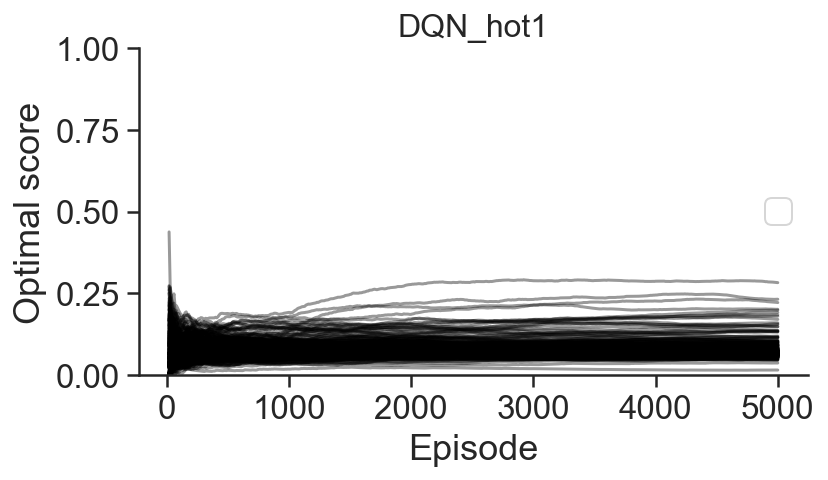

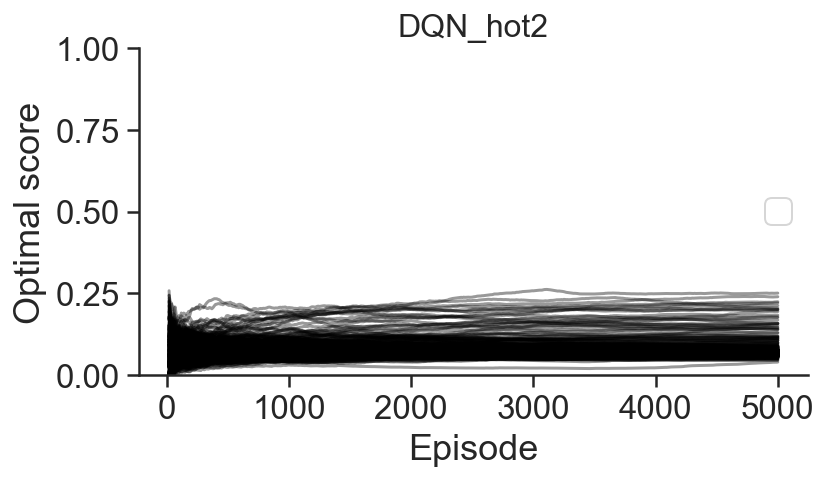

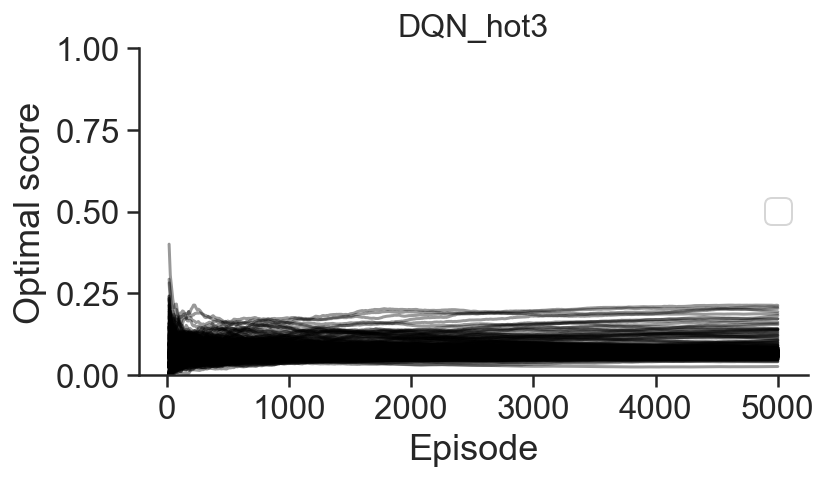

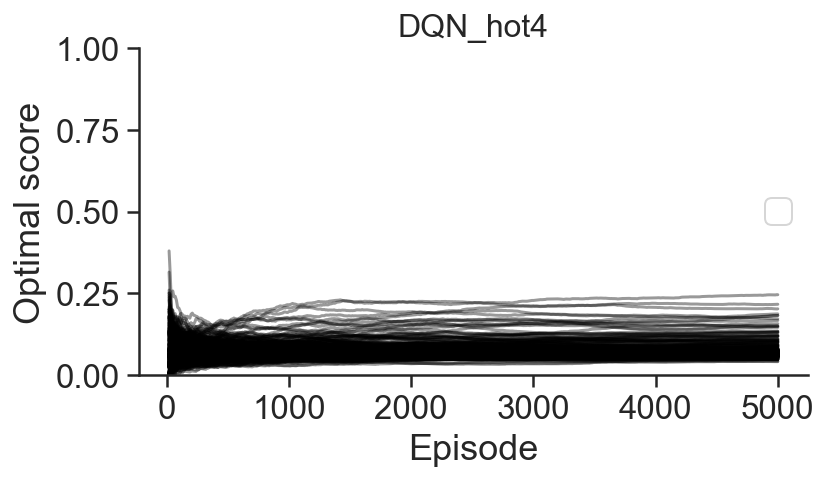

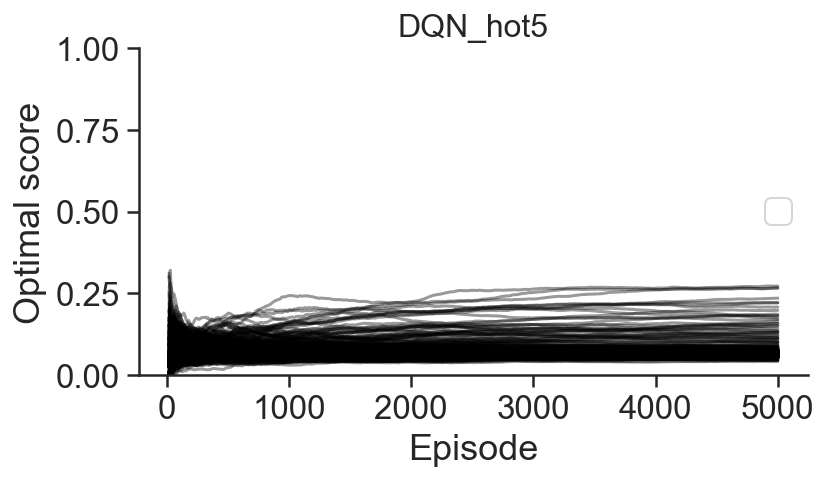

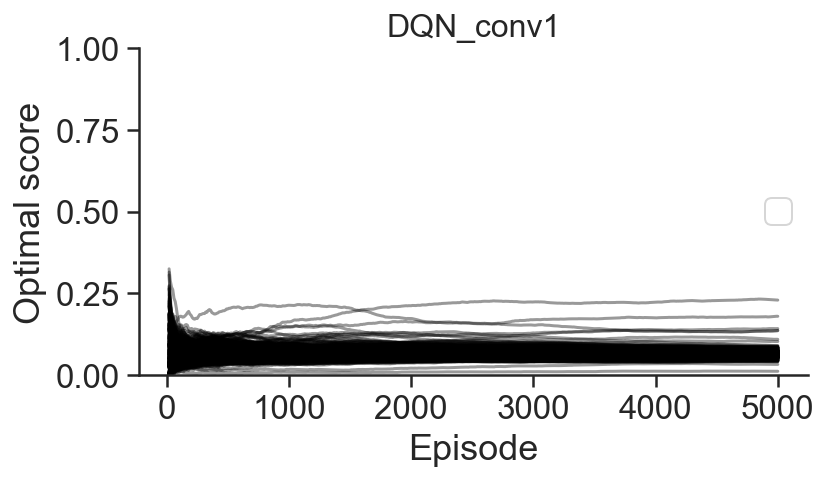

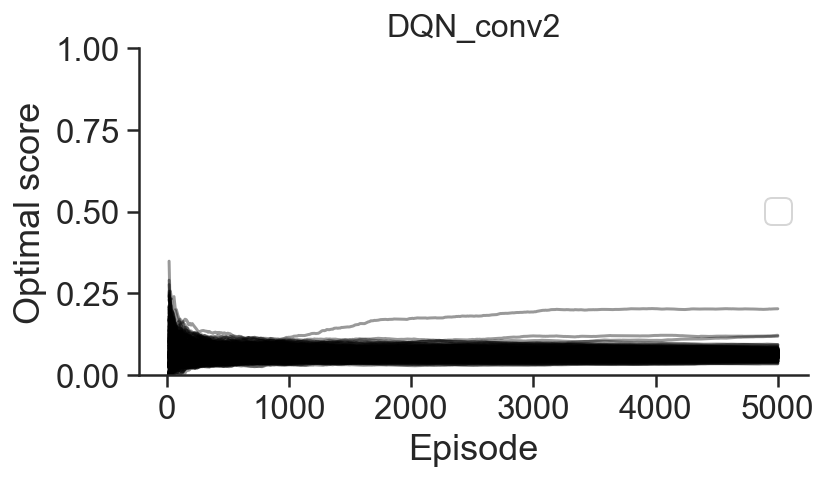

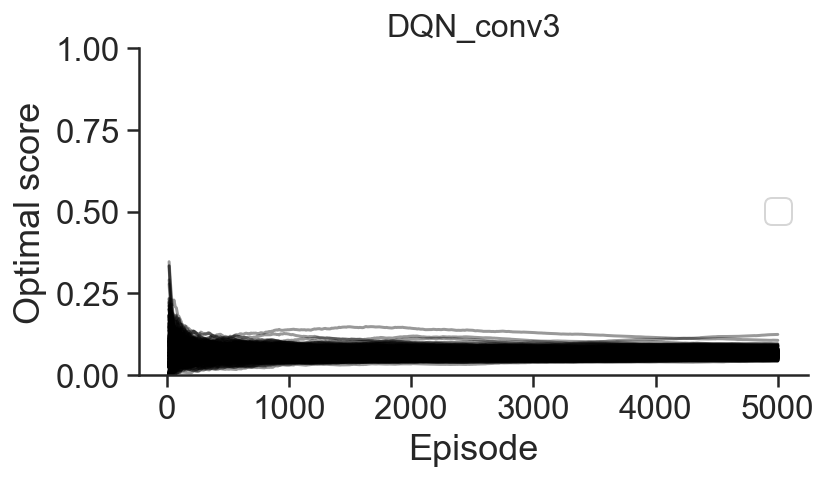

In [8]:
for model in models:
    exp_61 = load_data(path, model, run_index=index)
    plt.figure(figsize=(6, 3))
    for r, mon in enumerate(exp_61):
        if mon is not None:
            _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=0.4)
            _ = plt.ylim(0, 1)
    _ = plt.title(model)
    _ = plt.ylabel("Optimal score")
    _ = plt.xlabel("Episode")
    _ = plt.legend(loc="right")
    sns.despine()

- Still terrible.

# Find the best HP

In [97]:
for model in models:
    exp_61 = load_data(path, model, run_index=index)
    best_hp = find_best(hp_61, exp_61, (450,500))
    print(f"{model}:\n{best_hp}\n---")

DQN_hot1:
   row_code  device_code  epsilon  learning_rate
1         1            1      0.5         0.0102
---
DQN_hot2:
     row_code  device_code  epsilon  learning_rate
301       301            1      0.2         0.0102
---
DQN_hot3:
     row_code  device_code  epsilon  learning_rate
202       202            2      0.3         0.0203
---
DQN_hot4:
     row_code  device_code  epsilon  learning_rate
201       201            1      0.3         0.0102
---
DQN_hot5:
     row_code  device_code  epsilon  learning_rate
401       401            1      0.1         0.0102
---
DQN_conv1:
     row_code  device_code  epsilon  learning_rate
303       303            3      0.2         0.0304
---
DQN_conv2:
   row_code  device_code  epsilon  learning_rate
1         1            1      0.5         0.0102
---
DQN_conv3:
     row_code  device_code  epsilon  learning_rate
100       100            0      0.4         0.0001
---
